In [ ]:
# Import numpy, pandas, sklearn, matplotlib.
# Import lightgbm (gradient boosted decision tree algorithm)

In [1]:
import numpy as np
import pandas as pd
import sklearn as sl
import matplotlib.pyplot as plt
import lightgbm as lgbm

In [ ]:
# Load datasets into pandas

In [2]:
data=pd.read_csv('train.csv',index_col=0)
test=pd.read_csv('test.csv',index_col=0)

In [11]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# I join the training and test datasets so that I can investigate general features of the datasets

In [4]:
alldata=pd.concat([data.drop('Survived',axis=1),test])

In [ ]:
# I check that Age, Fare, Cabin and Embarked have missing values

In [12]:
print(test.columns[alldata.isnull().sum()>0])

Index(['Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')


In [ ]:
# I test some string manipulations to extract the title of the passenger from the Name feature.
# I find it surprising that 'the' appears as a title, so I check that it just stands for 'the Countess'

In [13]:
print(alldata.Name.map(lambda x: x.split(',')[1].split(' ')[1]).unique())

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'the' 'Jonkheer.' 'Dona.']


In [16]:
print(alldata.Name[alldata.Name.map(lambda x: x.split(',')[1].split(' ')[1])=='the'].values)

['Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)']


In [ ]:
# I look at the type of categories in Embarked and Cabin
# Around 77% of values in Cabin are missing, and still there are many distinct categories. 
# Therefore the frequency of each value is pretty low, so I will use only the first letter to distinguish categories

In [17]:
print(alldata.Embarked.unique())

['S' 'C' 'Q' nan]


In [18]:
print(alldata.Cabin.isnull().sum()/len(alldata))
print(alldata.Cabin.sort_values().unique())

0.774637127578304
['A10' 'A11' 'A14' 'A16' 'A18' 'A19' 'A20' 'A21' 'A23' 'A24' 'A26' 'A29'
 'A31' 'A32' 'A34' 'A36' 'A5' 'A6' 'A7' 'A9' 'B10' 'B101' 'B102' 'B11'
 'B18' 'B19' 'B20' 'B22' 'B24' 'B26' 'B28' 'B3' 'B30' 'B35' 'B36' 'B37'
 'B38' 'B39' 'B4' 'B41' 'B42' 'B45' 'B49' 'B5' 'B50' 'B51 B53 B55'
 'B52 B54 B56' 'B57 B59 B63 B66' 'B58 B60' 'B61' 'B69' 'B71' 'B73' 'B77'
 'B78' 'B79' 'B80' 'B82 B84' 'B86' 'B94' 'B96 B98' 'C101' 'C103' 'C104'
 'C105' 'C106' 'C110' 'C111' 'C116' 'C118' 'C123' 'C124' 'C125' 'C126'
 'C128' 'C130' 'C132' 'C148' 'C2' 'C22 C26' 'C23 C25 C27' 'C28' 'C30'
 'C31' 'C32' 'C39' 'C45' 'C46' 'C47' 'C49' 'C50' 'C51' 'C52' 'C53' 'C54'
 'C55 C57' 'C6' 'C62 C64' 'C65' 'C68' 'C7' 'C70' 'C78' 'C80' 'C82' 'C83'
 'C85' 'C86' 'C87' 'C89' 'C90' 'C91' 'C92' 'C93' 'C95' 'C97' 'C99' 'D'
 'D10 D12' 'D11' 'D15' 'D17' 'D19' 'D20' 'D21' 'D22' 'D26' 'D28' 'D30'
 'D33' 'D34' 'D35' 'D36' 'D37' 'D38' 'D40' 'D43' 'D45' 'D46' 'D47' 'D48'
 'D49' 'D50' 'D56' 'D6' 'D7' 'D9' 'E10' 'E101' 'E12'

In [ ]:
# I plot the distribution of ages

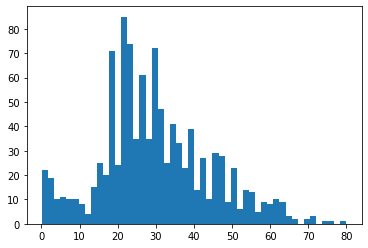

In [34]:
plt.hist(alldata.Age.fillna(alldata.Age.min()-1), range=(alldata.Age.min(), alldata.Age.max()), bins=50);

In [ ]:
# I plot the distribution of Fares and find it is quite skewed. 
# I check that applying a square root makes it a little more even.

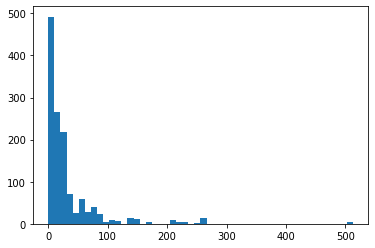

In [22]:
plt.hist(alldata.Fare.fillna(alldata.Fare.min()-1), range=(alldata.Fare.min(),alldata.Fare.max()), bins=50);

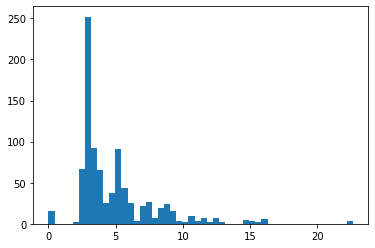

In [23]:
plt.hist(np.sqrt(data.Fare.fillna(-1)), range=(np.sqrt(alldata.Fare.min()), np.sqrt(alldata.Fare.max())), bins=50);

In [ ]:
# Finally, I see that both classes of labels are well represented in the training dataset

In [60]:
print(data.Survived.value_counts().values/len(data))

[0.61616162 0.38383838]


In [ ]:
# I apply the insights above to preprocess the data a bit before learning.
# I create new dataframes so that I keep the original data intact.
# I create a new category 'Family', given by 'SibSp'+'Parch', which denotes the total number of family members onboard
# I fill missing values in the Age and Fare category by the median of the training dataset (avoid data leakage)
# I rescale the Fare values with a square root to uniformize the distribution somewhat
# I fill missing values in both Cabin and Embarked with the letter 'Z', which does not exist in the datasets
# For the Cabin category I take only the first letter

In [35]:
Data=data[['Survived','Pclass','Sex','SibSp','Parch']]
Test=test[['Pclass','Sex','SibSp','Parch']]

Data=Data.assign(Family=data.SibSp+data.Parch)
Test=Test.assign(Family=test.SibSp+test.Parch)

AgeMedian=data.Age.median()
Data=Data.assign(Age=data.Age.fillna(AgeMedian))
Test=Test.assign(Age=test.Age.fillna(AgeMedian))

FareMedian=data.Fare.median()
Data=Data.assign(Fare=np.sqrt(data.Fare.fillna(FareMedian)))
Test=Test.assign(Fare=np.sqrt(test.Fare.fillna(FareMedian)))

Data=Data.assign(Title=data.Name.map(lambda x: x.split(',')[1].split(' ')[1]))
Test=Test.assign(Title=test.Name.map(lambda x: x.split(',')[1].split(' ')[1]))

Data=Data.assign(Embarked=data.Embarked.fillna('Z'))
Test=Test.assign(Embarked=test.Embarked.fillna('Z'))

Data=Data.assign(Cabin=data.Cabin.fillna('Z').map(lambda x: x[0]))
Test=Test.assign(Cabin=test.Cabin.fillna('Z').map(lambda x: x[0]))

In [ ]:
# I use the label encoder of sklearn to encode the categorical features of the datasets

In [36]:
from sklearn.preprocessing import LabelEncoder

cats=['Title','Sex','Cabin','Embarked']
AllData=pd.concat([Data,Test])

for cat in cats:
    encoder=LabelEncoder()
    encoder.fit(AllData[cat])
    Data[cat]=encoder.transform(Data[cat])
    Test[cat]=encoder.transform(Test[cat])

In [37]:
Data.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Family,Age,Fare,Title,Embarked,Cabin
PassengerId,,,,,,,,,,,
1,0,3,1,1,0,1,22.0,2.692582,12,2,8
2,1,1,0,1,0,1,38.0,8.442944,13,0,2
3,1,3,0,0,0,0,26.0,2.815138,9,2,8
4,1,1,0,1,0,1,35.0,7.286975,13,2,2
5,0,3,1,0,0,0,35.0,2.837252,12,2,8


In [ ]:
# I set apart 20% of the data for validation of the training algorithm.
# The shuffling is random, but I set a seed so the partitioning is always the same
# I check that the two classes are well distributed

In [63]:
train=Data.sample(frac=0.8,random_state=121)
valid=Data.drop(train.index,axis=0)
print(len(set(np.concatenate([train.index,valid.index])))==len(train)+len(valid)==len(Data))
print([train.Survived.value_counts().values/len(train),valid.Survived.value_counts().values/len(valid)])

True
[array([0.62973352, 0.37026648]), array([0.56179775, 0.43820225])]


In [ ]:
# I get the data ready to use with lightgbm

In [68]:
features=train.columns.drop('Survived')
Train=lgbm.Dataset(train[features],label=train['Survived'])
Valid=lgbm.Dataset(valid[features],label=valid['Survived'])

In [69]:
param1={'num_leaves':32,'objective':'binary','metric':'auc'}
model1=lgbm.train(param1,Train,100,valid_sets=[Valid],verbose_eval=True,early_stopping_rounds=10)

[1]	valid_0's auc: 0.836795
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.840321
[3]	valid_0's auc: 0.839167
[4]	valid_0's auc: 0.837051
[5]	valid_0's auc: 0.837949
[6]	valid_0's auc: 0.839295
[7]	valid_0's auc: 0.840962
[8]	valid_0's auc: 0.841987
[9]	valid_0's auc: 0.843269
[10]	valid_0's auc: 0.844487
[11]	valid_0's auc: 0.845897
[12]	valid_0's auc: 0.845769
[13]	valid_0's auc: 0.845256
[14]	valid_0's auc: 0.851282
[15]	valid_0's auc: 0.856282
[16]	valid_0's auc: 0.854231
[17]	valid_0's auc: 0.853782
[18]	valid_0's auc: 0.8575
[19]	valid_0's auc: 0.85641
[20]	valid_0's auc: 0.861795
[21]	valid_0's auc: 0.859551
[22]	valid_0's auc: 0.861154
[23]	valid_0's auc: 0.861795
[24]	valid_0's auc: 0.860577
[25]	valid_0's auc: 0.859423
[26]	valid_0's auc: 0.860705
[27]	valid_0's auc: 0.857692
[28]	valid_0's auc: 0.858974
[29]	valid_0's auc: 0.85641
[30]	valid_0's auc: 0.856795
Early stopping, best iteration is:
[20]	valid_0's auc: 0.861795


In [70]:
print(sl.metrics.roc_auc_score(train['Survived'], model1.predict(train[features])))
print(sl.metrics.roc_auc_score(valid['Survived'], model1.predict(valid[features])))

0.940570797057434
0.8617948717948719


In [199]:
pred1t=model1.predict(train[features])
pred1d=model1.predict(valid[features])
AccT=0.
AccD=0.
Tt=0.
Td=0.
for x in range(10000):
    NewT=sl.metrics.accuracy_score(train['Survived'], [int(i) for i in (pred1t>x/10000)])
    NewD=sl.metrics.accuracy_score(valid['Survived'], [int(i) for i in (pred1d>x/10000)])
    if NewT>AccT:
        AccT=NewT
        Tt=x/10000
    if NewD>AccD:
        AccD=NewD
        Td=x/10000        
print([[Tt,AccT],[Td,AccD]])
print([sl.metrics.accuracy_score(train['Survived'], [int(i) for i in (pred1t>Td)]),
       sl.metrics.accuracy_score(valid['Survived'], [int(i) for i in (pred1d>Tt)])])

[[0.4338, 0.8835904628330996], [0.3264, 0.8202247191011236]]
[0.8639551192145862, 0.8089887640449438]


In [196]:
def score(labels,probs,step):
    FPRs=[0]
    TPRs=[0]
    auc=0
    accuracies=[]
    for i in range(1,step+1):
        predictions=probs>(step-i)/step
        TP=labels[predictions].sum()
        FP=predictions.sum()-TP
        Pos=labels.sum()
        Neg=len(labels)-Pos 
        FPR=FP/Neg
        TPR=TP/Pos
        auc+=(FPR-FPRs[-1])*(TPR+TPRs[-1])/2
        FPRs.append(FPR)
        TPRs.append(TPR)
        accuracy=np.sum([i==j for i,j in np.array([labels,predictions]).T])/len(labels)
        accuracies.append(accuracy)
    posmax=np.argmax(accuracies)
    best_threshold=(step-posmax)/step
    return FPRs,TPRs,auc,accuracies[posmax],best_threshold

0.9405707970574346 0.8835904628330996 0.4433


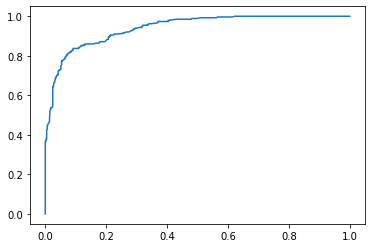

In [197]:
FPRs,TPRs,auc,accuracy,threshold=score(train['Survived'],model1.predict(train[features]),10000);
print(auc,accuracy,threshold)
plt.plot(FPRs,TPRs);

0.8617307692307684 0.8202247191011236 0.3294


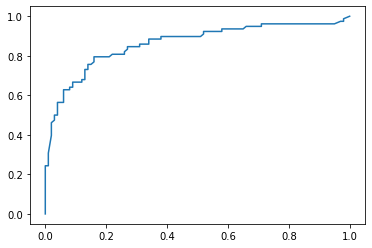

In [198]:
FPRs,TPRs,auc,accuracy,threshold=score(valid['Survived'],model1.predict(valid[features]),10000);
print(auc,accuracy,threshold)
plt.plot(FPRs,TPRs);

0.9241576923486623 0.8686868686868687 0.4345


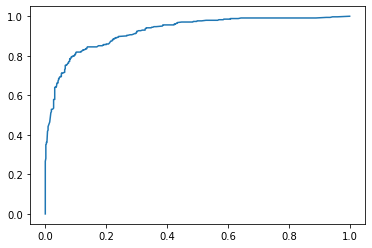

In [202]:
FPRs,TPRs,auc,accuracy,threshold=score(Data['Survived'],model1.predict(Data[features]),10000);
print(auc,accuracy,threshold)
plt.plot(FPRs,TPRs);

In [ ]:
param2={'num_leaves':32,'objective':'binary','metric':'binary_logloss'}
model2=lgbm.train(param2,Train,100,valid_sets=[Valid],verbose_eval=True,early_stopping_rounds=10)

In [ ]:
print(sl.metrics.roc_auc_score(train['Survived'], model2.predict(train[features])))
print(sl.metrics.roc_auc_score(valid['Survived'], model2.predict(valid[features])))

In [ ]:
pred2t=model2.predict(train[features])
pred2d=model2.predict(valid[features])
AccT=0.
AccD=0.
Tt=0.
Td=0.
for x in range(100):
    NewT=sl.metrics.accuracy_score(train['Survived'], [int(i) for i in (pred2t>x/100)])
    NewD=sl.metrics.accuracy_score(valid['Survived'], [int(i) for i in (pred2d>x/100)])
    if NewT>AccT:
        AccT=NewT
        Tt=x/100
    if NewD>AccD:
        AccD=NewD
        Td=x/100        
print([[Tt,AccT],[Td,AccD]])
print([sl.metrics.accuracy_score(train['Survived'], [int(i) for i in (pred2t>Td)]),
       sl.metrics.accuracy_score(valid['Survived'], [int(i) for i in (pred2d>Tt)])])

In [ ]:
param3={'num_leaves':32,'objective':'binary','metric':'binary_error','learning_rate':0.1}
model3=lgbm.train(param3,Train,100,valid_sets=[Valid],verbose_eval=True,early_stopping_rounds=10)

In [ ]:
print(sl.metrics.roc_auc_score(train['Survived'], model3.predict(train[features])))
print(sl.metrics.roc_auc_score(valid['Survived'], model3.predict(valid[features])))
print(sl.metrics.accuracy_score(train['Survived'], [int(i) for i in (model3.predict(train[features])
>0.5)]))
print(sl.metrics.accuracy_score(valid['Survived'], [int(i) for i in (model3.predict(valid[features])
>0.5)]))

In [ ]:
pred3t=model3.predict(train[features])
pred3d=model3.predict(valid[features])
AccT=0.
AccD=0.
Tt=0.
Td=0.
for x in range(100):
    NewT=sl.metrics.accuracy_score(train['Survived'], [int(i) for i in (pred3t>x/100)])
    NewD=sl.metrics.accuracy_score(valid['Survived'], [int(i) for i in (pred3d>x/100)])
    if NewT>AccT:
        AccT=NewT
        Tt=x/100
    if NewD>AccD:
        AccD=NewD
        Td=x/100        
print([[Tt,AccT],[Td,AccD]])
print([sl.metrics.accuracy_score(train['Survived'], [int(i) for i in (pred3t>Td)]),
       sl.metrics.accuracy_score(valid['Survived'], [int(i) for i in (pred3d>Tt)])])

In [ ]:
PredF=[int(x) for x in model3.predict(Test)>0.55]

In [ ]:
Final=Test[[]]
Final=Final.assign(Survived=PredF)
Final.head(10)

In [ ]:
Final.to_csv("Final.csv")

In [ ]:
dev_fracB=0.1
dev_nB=int(len(data)*dev_fracB)

choice=list(set(np.random.randint(0,len(data),2*dev_nB)))[:dev_nB]
trainB=Data.iloc[list(set(range(0,len(data)))-set(choice))]
validB=Data.iloc[choice]

print(trainB.Survived.value_counts())
print(validB.Survived.value_counts())

In [ ]:
features=trainB.columns.drop('Survived')
TrainB=lgbm.Dataset(trainB[features],label=trainB['Survived'])
ValidB=lgbm.Dataset(validB[features],label=validB['Survived'])

In [ ]:
param4={'num_leaves':16,'objective':'binary','metric':'binary_error','learning_rate':0.07}
model4=lgbm.train(param4,TrainB,200,valid_sets=[ValidB],verbose_eval=True,early_stopping_rounds=100)

In [ ]:
print(sl.metrics.roc_auc_score(trainB['Survived'], model4.predict(trainB[features])))
print(sl.metrics.roc_auc_score(validB['Survived'], model4.predict(validB[features])))

In [ ]:
pred4t=model4.predict(trainB[features])
pred4d=model4.predict(validB[features])
AccT=0.
AccD=0.
Tt=0.
Td=0.
for x in range(100):
    NewT=sl.metrics.accuracy_score(trainB['Survived'], [int(x) for x in (pred4t>x/100)])
    NewD=sl.metrics.accuracy_score(validB['Survived'], [int(x) for x in (pred4d>x/100)])
    if NewT>AccT:
        AccT=NewT
        Tt=x/100
    if NewD>AccD:
        AccD=NewD
        Td=x/100        
print([[Tt,AccT],[Td,AccD]])
print([sl.metrics.accuracy_score(trainB['Survived'], [int(x) for x in (pred4t>Td)]),
       sl.metrics.accuracy_score(validB['Survived'], [int(x) for x in (pred4d>Tt)])])

In [ ]:
PredFB=[int(x) for x in model4.predict(Test)>0.5]
sl.metrics.accuracy_score(PredF,PredFB)

In [ ]:
FinalB=Test[[]]
FinalB=FinalB.assign(Survived=PredFB)
FinalB.head(10)

In [ ]:
FinalB.to_csv("FinalB.csv")

In [ ]:
KF=sl.model_selection.KFold(n_splits=5,shuffle=False)

In [ ]:
features=Data.columns.drop('Survived')
param={'num_leaves':16,'objective':'binary','metric':'binary_error','learning_rate':0.09}
accuracies=[]
results=[]
for train_ind,valid_ind in KF.split(Data):
    train=Data.iloc[train_ind]
    valid=Data.iloc[valid_ind]
    Train=lgbm.Dataset(train[features],label=train['Survived'])
    Valid=lgbm.Dataset(valid[features],label=valid['Survived'])
    model=lgbm.train(param,Train,200,valid_sets=[Valid],verbose_eval=False,early_stopping_rounds=50)
    accuracy=sl.metrics.accuracy_score(valid['Survived'], [int(i) for i in (model.predict(valid[features])>0.5)])
    accuracies.append(accuracy)
    results.append(model.predict(Test))

In [ ]:
accuracies

In [ ]:
PredFC=[int(x) for x in (np.sum(results,axis=0)/5)>0.5]
print(sl.metrics.accuracy_score(PredF,PredFC),sl.metrics.accuracy_score(PredFB,PredFC))

In [ ]:
FinalC=Test[[]]
FinalC=FinalC.assign(Survived=PredFC)
FinalC.head(10)

In [ ]:
FinalC.to_csv("FinalC.csv")

In [ ]:
KF2=sl.model_selection.KFold(n_splits=7,shuffle=False)

In [ ]:
features=Data.columns.drop('Survived')
param={'num_leaves':16,'objective':'binary','metric':'binary_error','learning_rate':0.09}
accuracies2=[]
results2=[]
for train_ind,valid_ind in KF2.split(Data):
    train=Data.iloc[train_ind]
    valid=Data.iloc[valid_ind]
    Train=lgbm.Dataset(train[features],label=train['Survived'])
    Valid=lgbm.Dataset(valid[features],label=valid['Survived'])
    model=lgbm.train(param,Train,200,valid_sets=[Valid],verbose_eval=False,early_stopping_rounds=50)
    accuracy=sl.metrics.accuracy_score(valid['Survived'], [int(i) for i in (model.predict(valid[features])>0.5)])
    accuracies2.append(accuracy)
    results2.append(model.predict(Test))

In [ ]:
accuracies2

In [ ]:
PredFD=[int(x) for x in (np.sum(results2,axis=0)/5)>0.5]
print(sl.metrics.accuracy_score(PredF,PredFD),sl.metrics.accuracy_score(PredFB,PredFD),sl.metrics.accuracy_score(PredFC,PredFD))

In [ ]:
FinalD=Test[[]]
FinalD=FinalD.assign(Survived=PredFD)
FinalD.head(10)

In [ ]:
FinalD.to_csv("FinalD.csv")

In [ ]:
KF3=sl.model_selection.KFold(n_splits=3,shuffle=False)

In [ ]:
features=Data.columns.drop('Survived')
param={'num_leaves':16,'objective':'binary','metric':'binary_error','learning_rate':0.09}
accuracies3=[]
results3=[]
for train_ind,valid_ind in KF3.split(Data):
    train=Data.iloc[train_ind]
    valid=Data.iloc[valid_ind]
    Train=lgbm.Dataset(train[features],label=train['Survived'])
    Valid=lgbm.Dataset(valid[features],label=valid['Survived'])
    model=lgbm.train(param,Train,200,valid_sets=[Valid],verbose_eval=False,early_stopping_rounds=50)
    accuracy=sl.metrics.accuracy_score(valid['Survived'], [int(i) for i in (model.predict(valid[features])>0.5)])
    accuracies3.append(accuracy)
    results3.append(model.predict(Test))

In [ ]:
accuracies3

In [ ]:
PredFE=[int(x) for x in (np.sum(results3,axis=0)/5)>0.5]
print(sl.metrics.accuracy_score(PredF,PredFE),sl.metrics.accuracy_score(PredFC,PredFE))

In [ ]:
FinalE=Test[[]]
FinalE=FinalE.assign(Survived=PredFE)
FinalE.head(10)

In [ ]:
FinalE.to_csv("FinalE.csv")